In [82]:
# import hypertools as hyp
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.stats import spearmanr

### Load Embeddings

In [4]:
labels = pd.read_pickle('../Embedding Generation/EEG_raw.pkl')['wn_id']
def avg_embeddings(embeddings_mat,labels):
    df = pd.DataFrame({'embeddings':embeddings_mat.tolist(),'labels':labels})
    df['embeddings'] = df['embeddings'].apply(lambda x:np.array(x))
    grouped_embeddings = df.groupby('labels').agg('mean').reset_index()
    return np.vstack(grouped_embeddings['embeddings'].to_numpy())

In [71]:
def extract_dist(embedding_mat):
    embedding_dist = pairwise_distances(embedding_mat,metric='cosine')
    return embedding_dist[np.triu_indices(embedding_dist.shape[0],1)]

In [72]:
word_embeddings = np.load('Embeddings/word_embeddings.npy')
word_embeddings = StandardScaler().fit_transform(word_embeddings)
word_embeddings = avg_embeddings(word_embeddings,labels)

word_distances = extract_dist(word_embeddings)

In [73]:
img_embeddings = np.load('Embeddings/image_embeddings.npy')
img_embeddings = StandardScaler().fit_transform(img_embeddings)
img_embeddings = avg_embeddings(img_embeddings,labels)

img_distances = extract_dist(img_embeddings)

In [118]:
eeg_embeddings = np.load('Embeddings/eegnet_embeddings.npy')
# eeg_embeddings = np.load('Embeddings/timeseries_embeddings.npy')
eeg_embeddings = StandardScaler().fit_transform(eeg_embeddings)
eeg_embeddings = avg_embeddings(eeg_embeddings,labels)

eeg_distances = extract_dist(eeg_embeddings)

### Distance Corr

In [114]:
import matplotlib.lines as mlines
def add_corr_legend(r,pval,color:str):
    r_leg = mlines.Line2D([], [], color=color, marker='.', ls='', label=f'spearman r={r:0.1f}')
    pval_leg = mlines.Line2D([], [], color=color, marker='.', ls='', label=f'p value={pval:0.1f}')
    plt.legend(handles=[r_leg, pval_leg],bbox_to_anchor=(1.04, 1), loc="upper left")

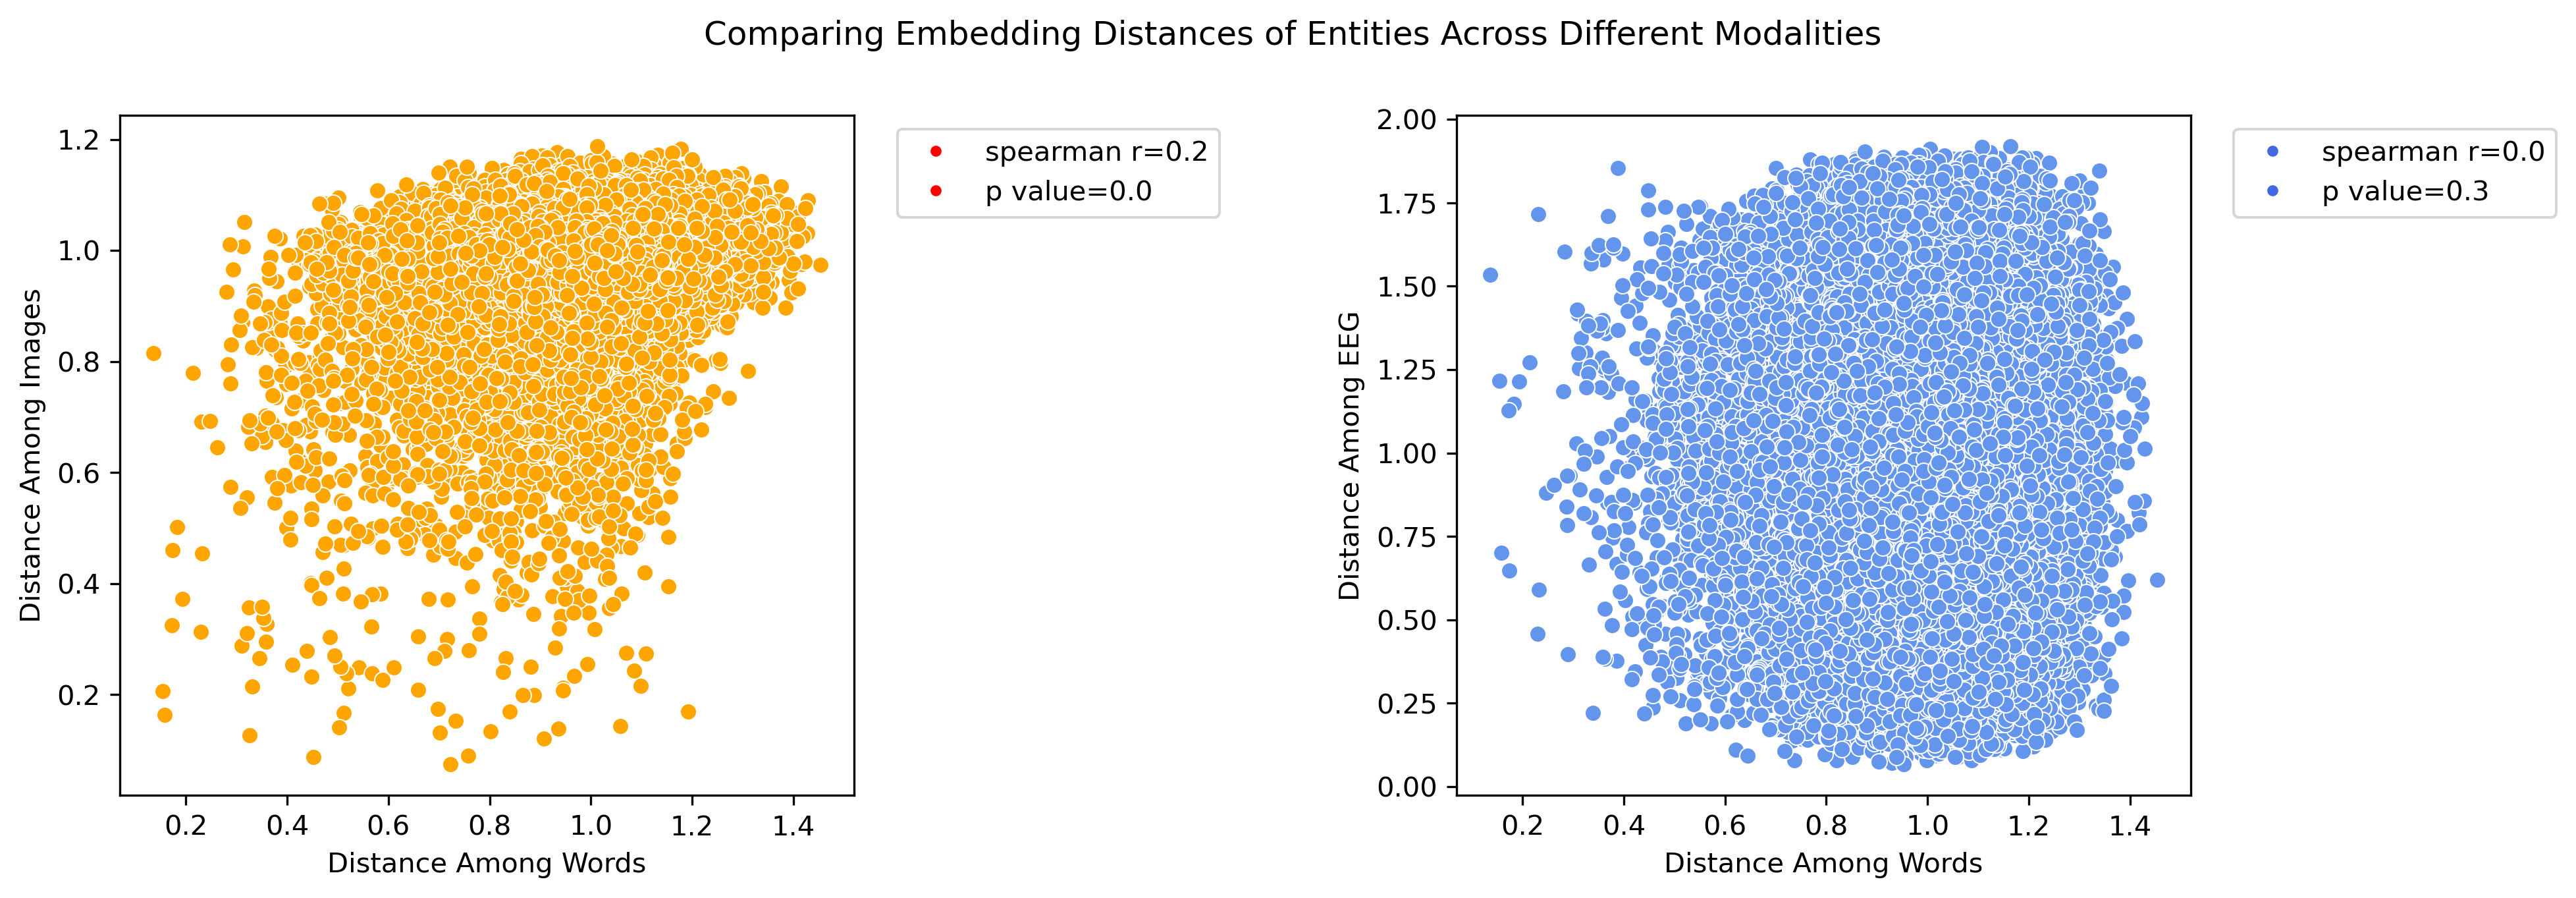

In [119]:
fig = plt.figure(figsize=(14,5),dpi=300)
plt.subplot(1,2,1)
sns.scatterplot(x=word_distances,y=img_distances,c='orange')
plt.xlabel('Distance Among Words')
plt.ylabel('Distance Among Images')
r,pval = spearmanr(word_distances,img_distances)
add_corr_legend(r,pval,'red')

plt.subplot(1,2,2)
sns.scatterplot(x=word_distances,y=eeg_distances,c='cornflowerblue')
plt.xlabel('Distance Among Words')
plt.ylabel('Distance Among EEG')
r,pval = spearmanr(word_distances,eeg_distances)
add_corr_legend(r,pval,'royalblue')

plt.tight_layout(pad=4)
plt.suptitle('Comparing Embedding Distances of Entities Across Different Modalities')
plt.show()